In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
#laptop
#MCF_DS = pd.read_csv("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\\MCF7_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ", engine='python', index_col=0)
#desktop
#C:\Users\Cameron\Desktop\AILab24\DropSeq
MCF_DS = pd.read_csv("C:\\Users\\Cameron\\Desktop\\AILab24\\DropSeq\\MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ", engine='python', index_col=0)

In [3]:
#laptop
#HCC_DS = pd.read_csv("C:\\Users\\camer\\Desktop\\class stuff\\Semester 4\\ai lab\\DropSeq\\HCC1806_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ", engine='python', index_col=0)
#desktop
#C:\Users\Cameron\Desktop\AILab24\DropSeq
HCC_DS = pd.read_csv("C:\\Users\\Cameron\\Desktop\\AILab24\\DropSeq\\HCC1806_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ", engine='python', index_col=0)

In [4]:
MCF_SS = pd.read_csv("C:\\Users\\Cameron\\Desktop\\AILab24\\SmartSeq\\MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
HCC_SS = pd.read_csv("C:\\Users\\Cameron\\Desktop\\AILab24\\SmartSeq\\HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)

In [5]:
#function to create a y column as a separate dataframe
#1 is Normoxia, 0 is Hypoxia
def oxia(df):
    new_row = {col: None for col in df.columns}
    for col in df.columns:
        if '_Nor' in col:
            new_row[col] = 1
        elif '_Hyp' in col:
            new_row[col] = 0
    return pd.DataFrame(new_row, index=['oxia'])

In [6]:
#Oxia them and split them into X and y
y_MCF_DS = oxia(MCF_DS).T
y_HCC_DS = oxia(HCC_DS).T
y_MCF_SS = oxia(MCF_SS)
y_HCC_SS = oxia(HCC_SS)

In [7]:
MCF_DS = MCF_DS.T
HCC_DS = HCC_DS.T
HCC_SS = HCC_SS.T
MCF_SS = MCF_SS.T
y_MCF_SS = y_MCF_SS.T
y_HCC_SS = y_HCC_SS.T

In [8]:
#split X and y into training and testing
X_train_MCF_DS, X_test_MCF_DS, y_train_MCF_DS, y_test_MCF_DS = train_test_split(MCF_DS, y_MCF_DS, test_size=0.3)
X_train_HCC_DS, X_test_HCC_DS, y_train_HCC_DS, y_test_HCC_DS = train_test_split(HCC_DS, y_HCC_DS, test_size=0.3)
X_train_MCF_SS, X_test_MCF_SS, y_train_MCF_SS, y_test_MCF_SS = train_test_split(MCF_SS, y_MCF_SS, test_size=0.3)
X_train_HCC_SS, X_test_HCC_SS, y_train_HCC_SS, y_test_HCC_SS = train_test_split(HCC_SS, y_HCC_SS, test_size=0.3)

In [9]:
#split testing into testing and validation
X_test_MCF_DS, X_val_MCF_DS, y_test_MCF_DS, y_val_MCF_DS = train_test_split(X_test_MCF_DS, y_test_MCF_DS, test_size=0.5)
X_test_HCC_DS, X_val_HCC_DS, y_test_HCC_DS, y_val_HCC_DS = train_test_split(X_test_HCC_DS, y_test_HCC_DS, test_size=0.5)
X_test_MCF_SS, X_val_MCF_SS, y_test_MCF_SS, y_val_MCF_SS = train_test_split(X_test_MCF_SS, y_test_MCF_SS, test_size=0.5)
X_test_HCC_SS, X_val_HCC_SS, y_test_HCC_SS, y_val_HCC_SS = train_test_split(X_test_HCC_SS, y_test_HCC_SS, test_size=0.5)

In [10]:
#put all the data into a dictionary
data = {'MCF_DS': [X_train_MCF_DS, X_test_MCF_DS, y_train_MCF_DS, y_test_MCF_DS, X_val_MCF_DS, y_val_MCF_DS],
        'HCC_DS': [X_train_HCC_DS, X_test_HCC_DS, y_train_HCC_DS, y_test_HCC_DS, X_val_HCC_DS, y_val_HCC_DS],
        'MCF_SS': [X_train_MCF_SS, X_test_MCF_SS, y_train_MCF_SS, y_test_MCF_SS, X_val_MCF_SS, y_val_MCF_SS],
        'HCC_SS': [X_train_HCC_SS, X_test_HCC_SS, y_train_HCC_SS, y_test_HCC_SS, X_val_HCC_SS, y_val_HCC_SS]}

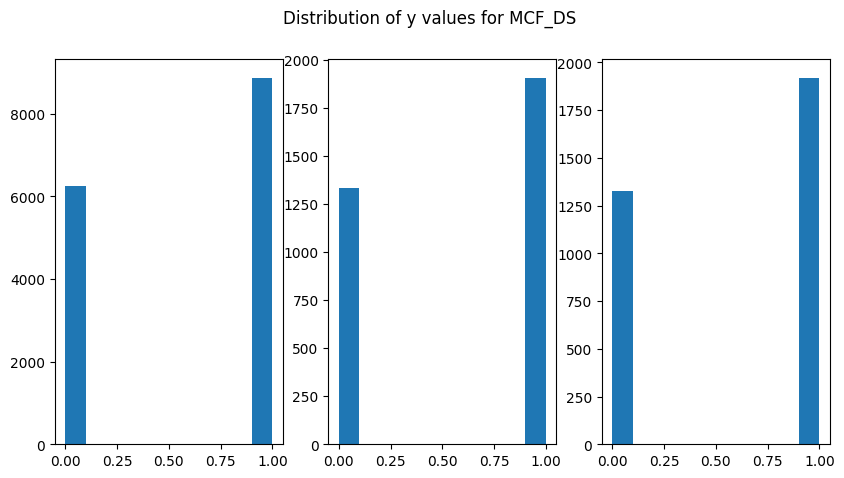

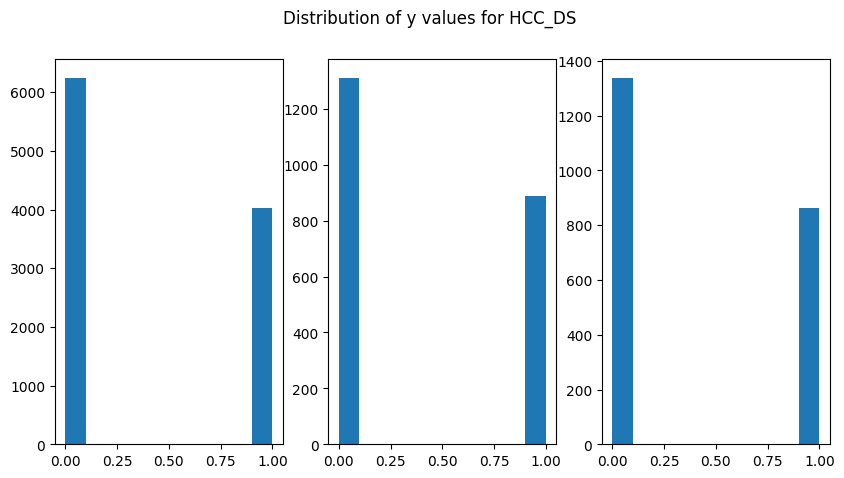

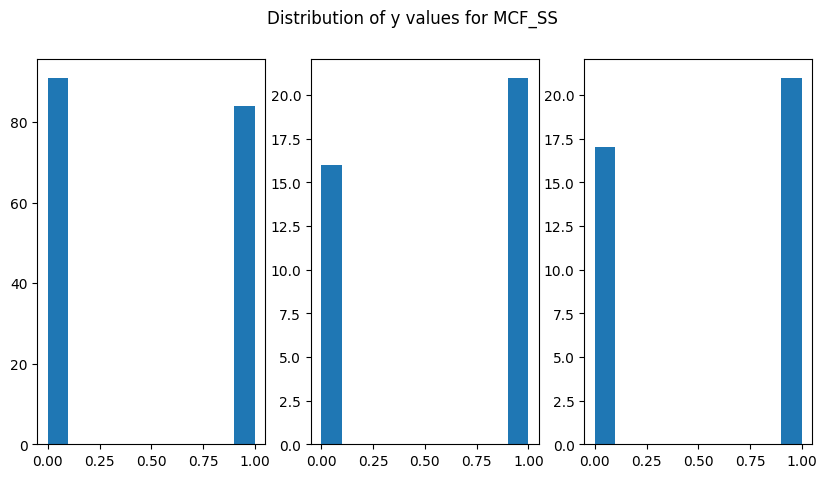

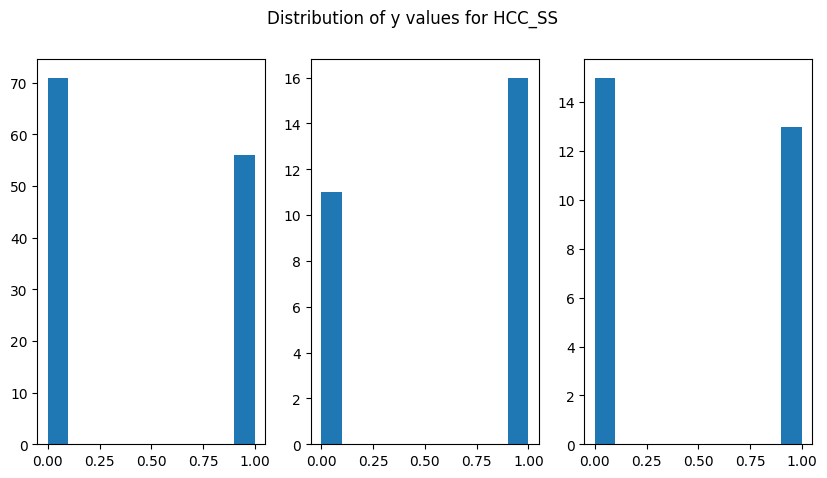

In [11]:
#go through the dict and print a plot for each set of data
for key in data:
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    fig.suptitle('Distribution of y values for ' + key)
    ax[0].hist(data[key][2])
    ax[1].hist(data[key][3])
    ax[2].hist(data[key][5])
    plt.show()

In [12]:
#dictionary of models:
models = {'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(random_state=42),
          'SVM': SVC(probability=True, random_state=42),
          'Neural Network': MLPClassifier(random_state=42, batch_size='auto', max_iter=1000000, solver='sgd')
          }

In [13]:
#now do this with a grid search to find optimal parameteters
#create a dictionary of parameters for each model
params = {'Logistic Regression': {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
          'KNN': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']},
          'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [10, 50, 100, 200]},
          'SVM': {'C': [1, 10], 'kernel': ['linear', 'rbf']},
          'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)], 'learning_rate_init': [0.1, 0.01, 0.001]},
          }

In [14]:
#print best parameters
#store the best parameters for each dataset and model in a dictionary
best_params = {}
for key in data:
    for model in models:
        grid = GridSearchCV(models[model], params[model], cv=5)
        grid.fit(data[key][0], np.ravel(data[key][2]))
        y_pred = grid.predict(data[key][1])
        best_params[key + model] = grid.best_params_    
        print(model, key, accuracy_score(data[key][3], y_pred), classification_report(data[key][3], y_pred))
        print(grid.best_params_)

Logistic Regression MCF_DS 0.9753390875462392               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1336
           1       0.97      0.98      0.98      1908

    accuracy                           0.98      3244
   macro avg       0.98      0.97      0.97      3244
weighted avg       0.98      0.98      0.98      3244

{'C': 0.1, 'penalty': 'l2'}
KNN MCF_DS 0.907829839704069               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1336
           1       0.98      0.86      0.92      1908

    accuracy                           0.91      3244
   macro avg       0.90      0.92      0.91      3244
weighted avg       0.92      0.91      0.91      3244

{'n_neighbors': 11, 'weights': 'uniform'}
Random Forest MCF_DS 0.9657829839704068               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1336
           1       0.95      0.99      0.97      190

In [15]:
print(best_params)

{'MCF_DSLogistic Regression': {'C': 0.1, 'penalty': 'l2'}, 'MCF_DSKNN': {'n_neighbors': 11, 'weights': 'uniform'}, 'MCF_DSRandom Forest': {'max_depth': 100, 'n_estimators': 200}, 'MCF_DSSVM': {'C': 10, 'kernel': 'rbf'}, 'MCF_DSNeural Network': {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.1}, 'HCC_DSLogistic Regression': {'C': 0.1, 'penalty': 'l2'}, 'HCC_DSKNN': {'n_neighbors': 3, 'weights': 'uniform'}, 'HCC_DSRandom Forest': {'max_depth': 100, 'n_estimators': 200}, 'HCC_DSSVM': {'C': 10, 'kernel': 'rbf'}, 'HCC_DSNeural Network': {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}, 'MCF_SSLogistic Regression': {'C': 0.001, 'penalty': 'l1'}, 'MCF_SSKNN': {'n_neighbors': 7, 'weights': 'uniform'}, 'MCF_SSRandom Forest': {'max_depth': 10, 'n_estimators': 50}, 'MCF_SSSVM': {'C': 1, 'kernel': 'rbf'}, 'MCF_SSNeural Network': {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}, 'HCC_SSLogistic Regression': {'C': 1, 'penalty': 'l1'}, 'HCC_SSKNN': {'n_neighbors': 7, 'wei

In [17]:
#now train an ensemble learning model off the best parameters of each model (only considering log, svm, and random forest)
#take the models from the best_params dictionary and put them into a dictionary indexed by dataset
ensemble_models = {}
for key in data:
    ensemble_models[key] = {'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, **best_params[key + 'Logistic Regression']),
                            'SVM': SVC(probability=True, random_state=42, **best_params[key + 'SVM']),
                            'Random Forest': RandomForestClassifier(random_state=42, **best_params[key + 'Random Forest'])}


In [18]:
#train the ensemble models
#remember their parameters
ensemble = {}
for key in data:
    ensemble[key] = VotingClassifier(estimators=[('lr', ensemble_models[key]['Logistic Regression']),
                                                 ('svm', ensemble_models[key]['SVM']),
                                                 ('rf', ensemble_models[key]['Random Forest'])], voting='soft')
    ensemble[key].fit(data[key][0], np.ravel(data[key][2]))
    y_pred = ensemble[key].predict(data[key][1])
    print(key, accuracy_score(data[key][3], y_pred), classification_report(data[key][3], y_pred))

MCF_DS 0.9818125770653514               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1336
           1       0.98      0.99      0.98      1908

    accuracy                           0.98      3244
   macro avg       0.98      0.98      0.98      3244
weighted avg       0.98      0.98      0.98      3244

HCC_DS 0.9677565849227975               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1312
           1       0.96      0.96      0.96       890

    accuracy                           0.97      2202
   macro avg       0.97      0.97      0.97      2202
weighted avg       0.97      0.97      0.97      2202

MCF_SS 1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted av